# Decision Tree on Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from sklearn import metrics
import time

In [2]:
df = pd.read_csv('winequalityN.csv')
#df = df.fillna(0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Checking for NULL Values
Sum = df.isnull().sum()
percentage = (df.isnull().sum()/df.isnull().count())
pd.concat([Sum,percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [4]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0]

In [5]:
fill_data = (null_cell(df)).index
print(fill_data)

Index(['fixed acidity', 'pH', 'volatile acidity', 'sulphates', 'citric acid',
       'residual sugar', 'chlorides'],
      dtype='object')


In [6]:
df_new = df.copy()
for col in fill_data:
    df_new.loc[:, col].fillna(df_new.loc[:, col].mean(), inplace=True)
     #df_new.loc[:, col].fillna(0)

In [7]:
df_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


In [8]:
df_new.type = df_new.type.map({'white':0, 'red':1})

In [9]:
df_new

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [10]:
x = df_new.iloc[:,:12]
y = df_new['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,train_size = 0.7)

In [11]:
def decTreeScore2(crit = 'gini',  maxDepth =3 , minSamples = 1, minSplit = 5):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    
    dect.fit(x_train, y_train)
    
    accuracy = accuracy_score(y_test, dect.predict(x_test))
    
    y_pred = dect.predict(x_test)
    a = confusion_matrix(y_test,y_pred)
    print(accuracy)
    print(a)
    
    return accuracy,a 

In [12]:
decTreeScore2()

0.5364102564102564
[[  0   0   4   2   0   0]
 [  0   0  45  17   1   0]
 [  0   0 462 174   4   0]
 [  0   0 293 544  25   0]
 [  0   0  37 248  40   0]
 [  0   0   2  45   7   0]]


(0.5364102564102564,
 array([[  0,   0,   4,   2,   0,   0],
        [  0,   0,  45,  17,   1,   0],
        [  0,   0, 462, 174,   4,   0],
        [  0,   0, 293, 544,  25,   0],
        [  0,   0,  37, 248,  40,   0],
        [  0,   0,   2,  45,   7,   0]], dtype=int64))

In [13]:
decTreeScore2(crit = 'entropy')

0.5235897435897436
[[  0   0   3   3   0   0]
 [  0   0  20  43   0   0]
 [  0   0 355 276   9   0]
 [  0   0 171 573 118   0]
 [  0   0  13 219  93   0]
 [  0   0   0  24  30   0]]


(0.5235897435897436,
 array([[  0,   0,   3,   3,   0,   0],
        [  0,   0,  20,  43,   0,   0],
        [  0,   0, 355, 276,   9,   0],
        [  0,   0, 171, 573, 118,   0],
        [  0,   0,  13, 219,  93,   0],
        [  0,   0,   0,  24,  30,   0]], dtype=int64))

In [19]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier


dect = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, 
                                 min_samples_split = 5, random_state= 42)

dect.fit(x_train, y_train)

Source(tree.export_graphviz(dect, out_file="decision_tree_q.dot", class_names=['3','4','5','6','7','8','9'], 
                            feature_names= x_train.columns)) # display the tree, with no output file
graphviz.render("dot","png","decision_tree_q.dot")

'decision_tree_q.dot.png'

In [15]:
y_pred = dect.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5364102564102564

In [16]:
#print(y_pred) # what the model predict entertainment labels
#print(y_test) # true labels
df_compare = pd.DataFrame({'YTest':y_test,'YPred':y_pred})
df_compare.head()

,YTest,YPred
3103,7,6
1419,7,6
4761,6,6
4690,6,6
4032,5,5


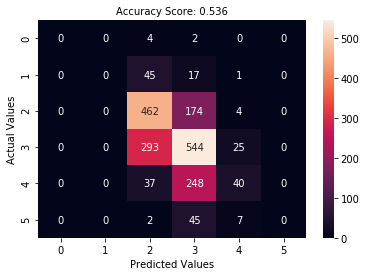

In [17]:
y_pred = dect.predict(x_test)
score = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred)

sn.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 10)
plt.show()